## MNIST Basic Approach

In [2]:
# Import Dependencies
import tensorflow as tf

# Import Dataset
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [4]:
# Load in MNIST Data
mnist = input_data.read_data_sets('dataset/MNIST_data/', one_hot=True)

Extracting dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting dataset/MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
# MNIST Images
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# Number of Images in MNIST Training Set
mnist.train.num_examples

55000

In [8]:
# Number of Images in MNIST Test Set
mnist.test.num_examples

10000

## Visualize Data

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Shape of MNIST Dataset
mnist.train.images.shape

(55000, 784)

In [19]:
# Shape of a Single Image => 784 => 28 x 28
mnist.train.images.shape[1]

784

In [20]:
# Print Pixel values for this image
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
# Take a single image from MNIST dataset for Plotting
# Reshape the image to a matrix of shape 28 x 28
image = mnist.train.images[1].reshape(28,28)

In [22]:
image.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

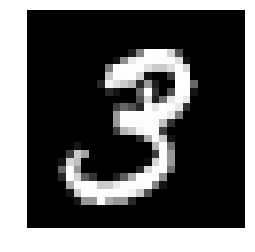

In [25]:
# Plot Image
plt.imshow(image, cmap='gray')
plt.axis('off')

In [26]:
# This data is already Normalized i.e between 0 and 1
image.max()

1.0

In [27]:
image.min()

0.0

## Tensorflow Session

In [31]:
# Define Placeholders

# Features
# None will be filled by "Batch Size"
X = tf.placeholder(tf.float32, shape=([None,784]))

# Labels
# Shape = [Batch Size, Labels]
y = tf.placeholder(tf.float32, shape=([None,10]))

In [53]:
# Variables

# Weights
# Shape = [Pixels,Labels]
W = tf.Variable(tf.random_normal([784,10]))

# Bias 
# Shape = [Labels]
b = tf.Variable(tf.ones([10]))

In [54]:
# Create Graph Operator
y_hat = tf.add(tf.matmul(X,W),b)

In [55]:
# Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))

In [56]:
# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [57]:
import numpy as np
cost_history = np.empty(shape=[1],dtype=float)

In [58]:
# Initialize Variables
init = tf.global_variables_initializer()

In [61]:
# Run TF Session
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    # TRAIN MODEL
    for batch in range(0,batches):
        
        # Get 100 samples at a time
        batch_x, batch_y = mnist.train.next_batch(1000)
        
        result, err = sess.run([optimizer, cross_entropy], feed_dict={X:batch_x , y:batch_y})
        cost_history = np.append(cost_history,sess.run(cross_entropy,feed_dict={X: batch_x, y: batch_y}))
    
    
        if batch%100 == 0:
            print('Epoch: {0}, Error: {1}'.format(batch, err))
    
    print('Epoch: {0}, Error: {1}'.format(batch+1, err))
    
    
    # Trained Weights & Biases
    new_W = sess.run(W)
    new_b = sess.run(b)
    
    # EVALUATE MODEL
    # tf.argmax: Return index of label with highest probability
    # Check if Predicted Label is Equal to Actual Label
    # Output: [True, False, True, ....]
    y_pred = tf.equal(tf.argmax(y_hat, axis=1), tf.argmax(y, 1))
    
    # Get all the Values in "y_pred" as [1,0,1,0,...]
    # tf.reduce_mean: take average of all values in the predictions
    accuracy = tf.reduce_mean(tf.cast(y_pred, tf.float32))
    
    # Calculate Accuracy
    print(sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))
    

Epoch: 0, Error: 14.28499984741211
Epoch: 100, Error: 1.1415044069290161
Epoch: 200, Error: 0.6741441488265991
Epoch: 300, Error: 0.4414214789867401
Epoch: 400, Error: 0.5127694606781006
Epoch: 500, Error: 0.4068842828273773
Epoch: 600, Error: 0.4581388533115387
Epoch: 700, Error: 0.38875269889831543
Epoch: 800, Error: 0.3961440324783325
Epoch: 900, Error: 0.4355643093585968
Epoch: 1000, Error: 0.2522207200527191
0.9106


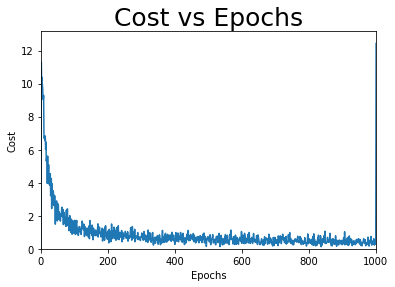

In [62]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,1000,0,np.max(cost_history)])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs', fontsize=25)
plt.show()